In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark example1').getOrCreate()

In [8]:
spark.stop()

# RDD에서 다룰 수 있는 데이터 타입(TypeSafe)

1. 비정형 데이터: ...jSON...
2. 정형 데이터:  List, csv, table


In [2]:
rdd_1 = spark.sparkContext.textFile('learing_spark_data/lod.txt')

In [5]:
import json
rdd2 = spark.sparkContext.textFile('learing_spark_data/data.json').map(json.loads)

# RDD 의 데이터 읽기 패턴
1. RDD생성: type지정 하지 않기
2. 형식변환: map()
3. take(n)

# 스파크컨텍스트 객체
1. SparkSesstion.getOrCreate: 세션객체로 부터 사전에 설정된 변수에 맞춰 컨텍스트를 생성
2. SparkConf + SparkContext -> 저수준 연산에 적합한 방식

In [7]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster('local').setAppName('country-stdent-counts2')
conf


In [9]:
spark = SparkContext(conf = conf).getOrCreate()

In [10]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.driver.host', '6c8dcd110e07'),
 ('spark.app.name', 'country-stdent-counts2'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('sp

In [11]:
spark.stop()

In [12]:
import os
os.getcwd() # 컨테이너 내부 경로

'/home/jovyan/work'

In [13]:
dir = os.path.join(os.getcwd(), 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [14]:
filename  = 'xAPI-Edu-Data.csv'
filepath = os.path.join(dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv'

In [15]:
spark = SparkContext(conf = conf).getOrCreate()

In [16]:
lines = spark.textFile('file:///'+filepath.replace('\\', '/'))
lines

file:////home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [17]:
header = lines.first()

In [18]:
datas = lines.filter(lambda row : row != header)
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [21]:
conturies = datas.map(lambda row:row.split(',')[2])

In [22]:
conturies

PythonRDD[5] at RDD at PythonRDD.scala:53

In [23]:
conturies.take(3)

['KuwaIT', 'KuwaIT', 'KuwaIT']

In [25]:
result = conturies.countByValue()
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [26]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [28]:
sorted(result.items(),key = lambda x:x[1],reverse = True)

[('KuwaIT', 180),
 ('Jordan', 176),
 ('Iraq', 22),
 ('lebanon', 19),
 ('SaudiArabia', 16),
 ('USA', 16),
 ('Palestine', 10),
 ('Egypt', 9),
 ('Tunis', 9),
 ('Iran', 6),
 ('Syria', 6),
 ('Lybia', 6),
 ('Morocco', 4),
 ('venzuela', 1)]

In [30]:
# 정렬된 리스트를 변수에 저장
sorted_list = sorted(result.items(), key=lambda x: x[1], reverse=True)

# 상위 3개 항목만 슬라이싱으로 추출
top3 = sorted_list[:3]

print(top3)

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]


In [33]:
total_sum = sum(result.values())

In [35]:
ratio = {k:round(v/total_sum*100,2)for k,v in result.items()}
    

In [36]:
ratio

{'KuwaIT': 37.5,
 'lebanon': 3.96,
 'Egypt': 1.88,
 'SaudiArabia': 3.33,
 'USA': 3.33,
 'Jordan': 36.67,
 'venzuela': 0.21,
 'Iran': 1.25,
 'Tunis': 1.88,
 'Morocco': 0.83,
 'Syria': 1.25,
 'Iraq': 4.58,
 'Palestine': 2.08,
 'Lybia': 1.25}

<BarContainer object of 14 artists>

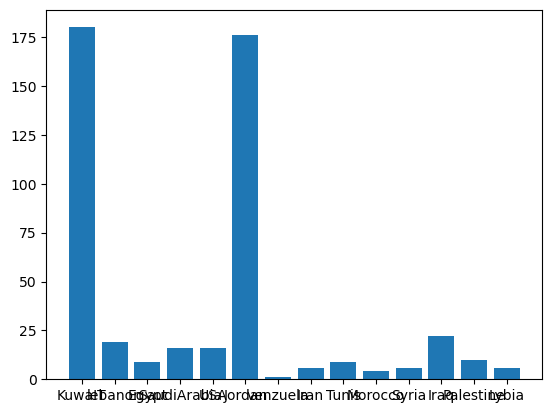

In [38]:
import matplotlib.pyplot as plt
conrtry = list(result.keys())
counts = list(result.values())
plt.bar(conrtry, counts)

## RDD 연습

In [51]:
spark = SparkSession.builder.appName('pyspark example2').getOrCreate() 

In [52]:
# 2. RDD 생성 - 기본 리스트
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

countries = spark.sparkContext.parallelize(data)
countries

ParallelCollectionRDD[14] at readRDDFromFile at PythonRDD.scala:289

In [53]:
# 소문자로 변환 lower()
countries_lower = countries.map(lambda x:x.lower())
countries_lower.take(5)

['kuwait', 'lebanon', 'jordan', 'jordan', 'usa']

In [54]:
# jordan 추출
jordan = countries_lower.filter(lambda x:x=='jordan')
jordan.collect()

['jordan', 'jordan', 'jordan']

In [55]:
# 몇개국인지 세어보세요 : distinct()> count()
unique_countries = countries_lower.distinct()
unique_countries.count()

6

In [56]:
# 국가별 빈도수
data
country_pairs = countries_lower.map(lambda x: (x,1))
country_pairs.take(1)

[('kuwait', 1)]

In [57]:
country_counts = country_pairs.reduceByKey(lambda a,b: a+b)
country_counts.take(2)

[('kuwait', 2), ('lebanon', 1)]

In [58]:
country_counts.take(6)

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [59]:
country_counts.collect()

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [60]:
country_counts.sortByKey().collect()

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [61]:
country_counts.sortBy( lambda x:x[1], ascending=False).collect()

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [62]:
countries.reduce(lambda a, b: a+','+b) #변환

'KuwaIT,lebanon,Jordan,Jordan,USA,Egypt,Jordan,USA,Iran,Iran,KuwaIT'

# 저장소에 저장하기

In [65]:
output_path = 'output/countrise_result'

In [66]:
countries.saveAsTextFile(output_path) # 저장소경로

In [70]:
import shutil

In [71]:
if os.path.exists(output_path):
    shutil.rmtree(output_path)
countries.saveAsTextFile(output_path) # 저장소 경로

In [72]:
spark.stop()

## mnm_dataset.csv 를 읽어서 주별 총 사탕수 구하기### 
주별, 색상별 개수

In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark example2').getOrCreate() 

In [14]:
rdd = spark.sparkContext.textFile('learning_spark_data/mnm_dataset.csv')

In [20]:
header = rdd.first()
data = rdd.filter(lambda line: line != header)\
.map(lambda line:line.split(','))

In [21]:
data.take(3)

[['TX', 'Red', '20'], ['NV', 'Blue', '66'], ['CO', 'Blue', '79']]

In [22]:
rdd1 = data.map(lambda x:(x[0], int (x[2])))
rdd1.take(3)

[('TX', 20), ('NV', 66), ('CO', 79)]

In [23]:
rdd1 = rdd1.reduceByKey(lambda a,b: a+b)
rdd1.take(3)

[('TX', 556493), ('NV', 548477), ('CO', 556302)]

In [25]:
# state, color count
rdd3 = data.map(lambda x:((x[0], x[1]), int(x[2])))\
. reduceByKey(lambda a, b: a+b)

rdd3.take(3)

[(('TX', 'Red'), 95404), (('NV', 'Blue'), 90003), (('CO', 'Blue'), 93412)]

In [26]:
rdd3.collect()

[(('TX', 'Red'), 95404),
 (('NV', 'Blue'), 90003),
 (('CO', 'Blue'), 93412),
 (('OR', 'Blue'), 90526),
 (('WA', 'Yellow'), 92920),
 (('WY', 'Blue'), 91002),
 (('CA', 'Yellow'), 100956),
 (('WA', 'Green'), 96486),
 (('OR', 'Green'), 89578),
 (('TX', 'Green'), 95753),
 (('NV', 'Green'), 91331),
 (('AZ', 'Brown'), 92287),
 (('AZ', 'Blue'), 89971),
 (('OR', 'Brown'), 89136),
 (('NV', 'Red'), 89346),
 (('WY', 'Orange'), 87956),
 (('TX', 'Brown'), 90736),
 (('CO', 'Red'), 89465),
 (('AZ', 'Green'), 91882),
 (('NM', 'Yellow'), 92747),
 (('WA', 'Red'), 93332),
 (('WY', 'Red'), 91768),
 (('TX', 'Orange'), 92315),
 (('WY', 'Yellow'), 87800),
 (('CO', 'Orange'), 90971),
 (('NV', 'Orange'), 93929),
 (('WY', 'Green'), 94339),
 (('CA', 'Green'), 93505),
 (('UT', 'Red'), 90995),
 (('CA', 'Red'), 91527),
 (('TX', 'Yellow'), 93819),
 (('WA', 'Orange'), 91521),
 (('AZ', 'Orange'), 91684),
 (('AZ', 'Red'), 90042),
 (('CA', 'Blue'), 89123),
 (('CO', 'Brown'), 93692),
 (('UT', 'Green'), 88392),
 (('NM', 'G

In [28]:
# output으로 내보내기
import os
output_path = 'output/mnms_result'

if os.path.exists(output_path):
    shutil.rmtree(output_path)
rdd3.saveAsTextFile(output_path) #저장소 경로

In [36]:
!python 02_mnms_result_test.py 

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/04 02:06:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/08/04 02:06:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
결과 미리보기----
(('TX', 'Red'), 95404)
(('NV', 'Blue'), 90003)
(('CO', 'Blue'), 93412)
(('OR', 'Blue'), 90526)
(('WA', 'Yellow'), 92920)
총 데이터 라인 수 : 60
